## Question 2) Nonlinear Classification Boundaries with Kernels
In your discussion of SVM's, we discussed the idea of **linear separability** for our input data and we also saw how featurizing helps when this is not the case. In this problem, we're going to take a look at decision boundaries that may be nonlinear, and how kernels can help us classify datasets where such decision boundaries best capture our underlining data features. We will explore and compare the following kernels; Linear, Polynomial, Sigmoid, RBF, and Rotational Quadratic. 

### Question 2a)
For the purposes of this problem we will be working with the sklearn built-in half moons dataset. Run the code below to load this dataset and create a scatter-plot from this data. Describe whether this data appears linear seperable or not. Can we expect good performance from a linear classification boundary using SVM?

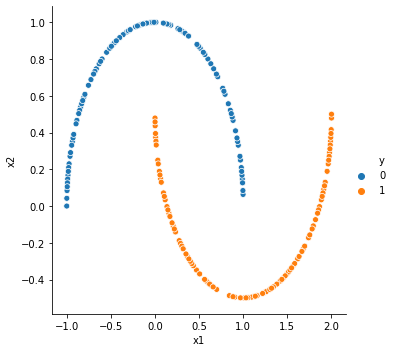

In [2]:
# IMPORT LIBRARIES
from sklearn import datasets, svm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samples = 300
X, Y = datasets.make_moons(samples)
X_train = X[:200]
Y_train = Y[:200]
X_test = X[200:]
Y_test = Y[200:]

# Make a Pandas style dataframe:
df = pd.DataFrame({'x1': X_train[:,0], 'x2': X_train[:,1], 'y': Y_train})
# Scatterplot:
sns.relplot(data=df, x='x1', y='x2', hue='y', kind='scatter')

**Include your answer here...**

### Question 2b)
Lets set a baseline for our classification by using SVM with a soft-max margin and a linear decision boundary. Fill in the code below to perform the classification, create the visualization of the decision boundary along with the support vectors, and report the classification accuracy.

In [ ]:
# 1b(i) fill in this method for an SVM with a linear fit of our data
def fitLinearModel(X, Y):
    '''
    input: X is input data, and Y the corresponding labels 
    output: svm.SVC object with a linear fit of our data
    '''
    clf = ... # your code here
    # ---- answer
    clf = svm.SVC(kernel='linear')
    clf.fit(X, Y)
    # ----
    return clf

# 1b(ii) fill in this method to create the visualizations
def drawSVM(clf, fignum=1):
    '''
    input: clf is an svm.SVC object, and fignum the current figure number.
    output: svm.SVC object with a linear classification
    '''
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()

    sv_x1 = ... # x1 coordinates of the support vectors, your code here
    sv_x2 = ... # x2 coordinates of the support vectors, your code here
 
    plt.scatter(sv_x1, sv_x2, 
                s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(df['x1'], df['x2'], c=df['y'], 
                zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3

    # Create 200x200 uniform samples across [x_min, x_max]*[y_min, y_max]
    xy_samples = ... # Your code here

    Z = clf.decision_function(xy_samples)
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(8, 6))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])


clf = fitLinearModel(X_train, Y_train)
drawSVM(clf)
plt.show()

In [ ]:
# 1b(iii) Fill in the code to get your classification accuracy based on the test data
score = ...
print("Linear boundary SVM classification average accuracy: ", score)


Linear boundary SVM classification average accuracy:  Ellipsis


### Question 2c)
We have seen the SVM classify our dataset by drawing a linear decision boundary, and we saw how our data naturally expresses itself. We would like to explore whether this natural expression produces more accurate classifications under a non-linear decision boundary. For this part of the question, we will explore a polynomial decision boundary using a degree d polynomial kernel function. Fill in the code below to perform the classification under different d degree values. Find and report the optimal degree d choice for which the best classification accuracy is obtained. Finally, re-use your drawing method from the previous part to create a visualization of the decision boundary along with the support vectors in-use. 

In [ ]:
degrees = list(range(2, 7))
# 1c(i) fill in this method for an SVM with a polynomial fit of our data
def fitLinearModel(X, Y, d):
    '''
    input : X is input data, Y the corresponding labels, and 
            d is the degree of the polynomial kernel function
    output:  svm.SVC object fitting X, Y using a polynomial kernel
    '''
    clf = ... # your code here
    return clf

# 1c(ii) find in this method that returns the svm.SVC object along with
# the degree choice and classification results
def chooseBest(X, Y):
    '''
    input : X is input data, and Y the corresponding labels
    output: degree associated with the highest accuracy,
            svm.SVC object with best degree choice polynomial classification
            accuracy achoived the svm on our dataset
    '''
    return best_degree, best_svm, best_score

In [ ]:
# 1c(iii) Create the visualization of this decision boundary and support vectors
# report the classification average accuracy

print(d, "-degree Polynomial boundary SVM with classification average accuracy: ", score)

### Question 2d)
Fill in the code below to perform the classification using the Sigmoid kernel. Draw the decision boundary found by SVM with this kernel and report the classification accuracy.

In [ ]:
# Note, you may want to consider the figure's axis to choose C
# 1d(i) fill in this method for an SVM with a RBF fit of our data
def fitSigmoidModel(X, Y, C=.1, gamma='scale'):
    '''
    input : X is input data, and Y the corresponding labels
    output: svm.SVC object fitting X, Y using a Sigmoid kernel
    '''
    clf = ... # your code here
    return clf

clf = fitSigmoidModel(X_train, Y_train)

In [ ]:
# 1d(ii) Create the visualization of this decision boundary and support vectors
# report the classification average accuracy
score = ...
print("Sigmoid Kerneled SVM with classification average accuracy: ", score)

### Question 2e)
We have now seen a linear decision boundary, a polynomial decision boundary, and a sigmoid kernel induced decision boundary. Alternatively, we can consider the performance of the RBF kernel in this dataset and the decision boundary induced by this. 

Fill in the code below to perform the classification using the RBF kernel. Draw the decision boundary found by SVM with this kernel and report the classification accuracy.

In [ ]:
# 1e(i) fill in this method for an SVM with a RBF fit of our data
def fitRBFModel(X, Y):
    '''
    input : X is input data, and Y the corresponding labels
    output: svm.SVC object fitting X, Y using a RBF kernel
    '''
    clf = ... 
    return clf

clf = fitRBFModel(X_train, Y_train)

In [ ]:
# 1e(ii) Create the visualization of this decision boundary and support vectors
# report the classification average accuracy

score = ...
print("RBF Kerneled SVM with classification average accuracy: ", score)

### Question 2f)
We have now exhausted the default carried kernels in Scikits SVM. This does not mean, however, we do not have more Kernel functions to test. For exploratory purposes, this part of the question will guide you through introducing alternative kernels to SVM. We will have to take a slightly different approach when using SVM as custom kernels produce different behavior. For example, we will not have our support_vector filled automatically. We will also not have the Gram Matrix precomputed for us, and so we will have to do this for our data matrix and for any prediction. For your reference, we have included an implementation for the Gaussian Kernel:

$$ K(x, y) = \exp{(\frac{-||x-y||^2}{2\sigma^2})} $$


Fill in the code below to implement the Rotational Quadratic Kernel:
$$ K(x, y) = 1 - \frac{||x-y||^2}{||x-y||^2+c} $$

In [ ]:
import numpy as np
from sklearn import svm

# 1f(i) fill in this method to compute the Gram matrix based on a custom kernel.
def getGM(X1, X2, kernel):
    """
    input: 
    output: Return the Gram matrix with the kernel evaluated on the pairs of
            rows from X1, X2
    """
    return gram_matrix

# As an example here is the Gaussian Kernel
def gaussKernel(x1, x2, sigma=.1):
  return np.exp(- np.sum( np.power((x1 - x2),2) ) / float( 2*(sigma**2) ) )

# 1f(ii) fill in the method below to evaluate the rotational quadratic kernel
def rot_quad_kernel(x1, x2, c=0.01):
  # your code here
  pass

clf = svm.SVC(kernel="precomputed")

# 1f(iii) fill in the lines below to fit the data using our kernel choice.
# Hint: use the Gram matrix as you would a featurize matrix.

We can no longer reuse our previous drawing methods because we need to make sure we transform according to our kernel. Thus, the data matrix we should use to fit should be comprised of evaluating all pairs of rows from our original matrix. Similarly, any predictions should also be transformed to consist of kernel evaluations of the new data points and the original train data points. Note, it may take a while to load the drawing method since we are not necessarily requiring optimized runtimes. 

In [ ]:
# 1f(iii) Modify the previous draw function so that it works with SVM
def drawSVMK(clf, getGram, fignum=1):
    '''
    input: clf is an svm.SVC object, and fignum the current figure number.
    output: svm.SVC object with a linear classification
    '''
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()
    plt.scatter(df['x1'], df['x2'], c=df['y'], 
                zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3

    # Create 200x200 uniform samples across [x_min, x_max]*[y_min, y_max]
    xy_samples = ... # Your code here (can reuse as before)

    # Recall, we have to make use of our kernel to build a new Gram matrix
    # for our inputs. Uncomment and fill in to sample our decision boundary

    # Z = clf.predict(your_code_here)

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(8, 6))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

drawSVMK(clf, myGM)
score = clf.score(myGM(X_test, X_train), Y_test)
# ---
print("My Kerneled SVM with classification average accuracy: ", score)

### Question 2g)
Rank the SVM performance under the different kernel choices and explain how these boundaries affected our classification accuracy.

** Your answer here **